In [1]:
%matplotlib inline

import __builtin__
from solver import *
from timing import *
from plotting_helpers import plot_some
from board import *

from piece import *
import sys
from multiprocessing import Pool
import multiprocessing as mp

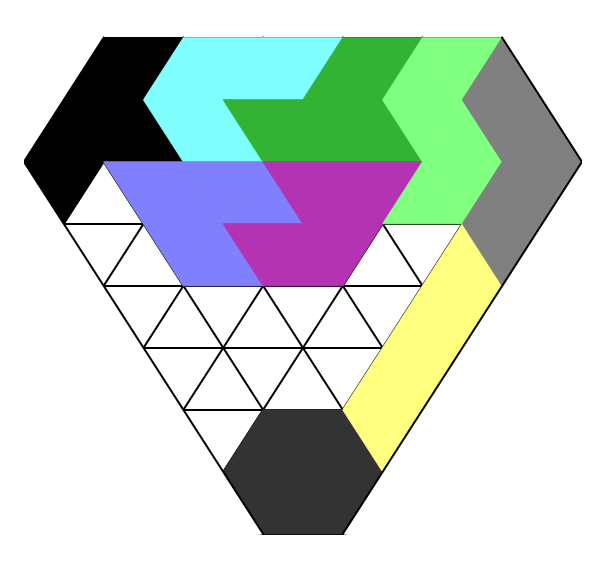

In [2]:
b = Board()

p1 = Piece('hexagon')
b.place(p1,[6,1])

p2 = Piece('line')
p2.rotate(2)
b.place(p2,[3,9])

p3 = Piece('boat')
p3.rotate(2)
b.place(p3,[0,1])

p4 = Piece('v')
p4.rotate(2)
b.place(p4,[0,10])

p5 = Piece('s')
p5.rotate()
p5.mirror()
b.place(p5,[0,9])

p6 = Piece('check')
p6.rotate(4)
b.place(p6,[1,4])

p7 = Piece('fedex')
p7.mirror()
b.place(p7,[0,7])

p8 = Piece('mountains')
p8.rotate(5)
b.place(p8,[3,4])

p9 = Piece('heart')
p9.mirror()
b.place(p9,[2,5])

# p10 = Piece('weird')

# p11 = Piece('tie')
# p11.rotate()
# b.place(p11,[4,3])

# p12 = Piece('nike')
# p12.mirror()
# p12.rotate(2)
# b.place(p12,[4,2])


b.print_board()

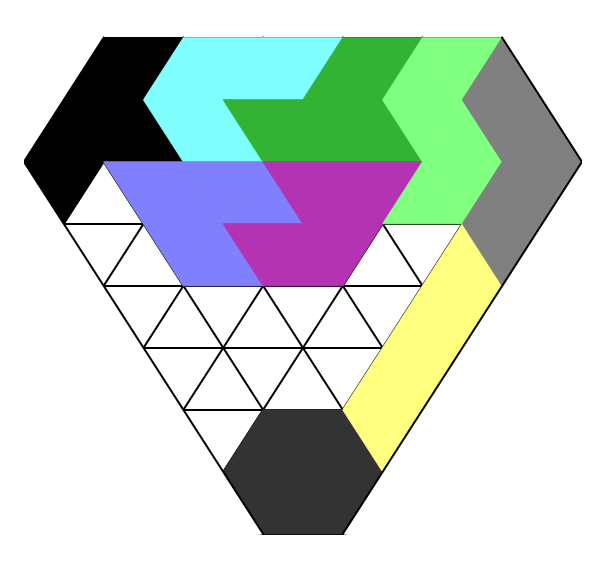

doing a depth first search with this


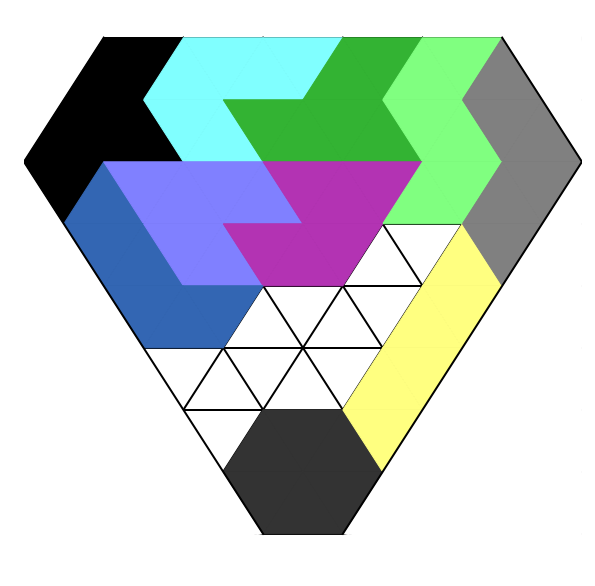

doing a depth first search with this


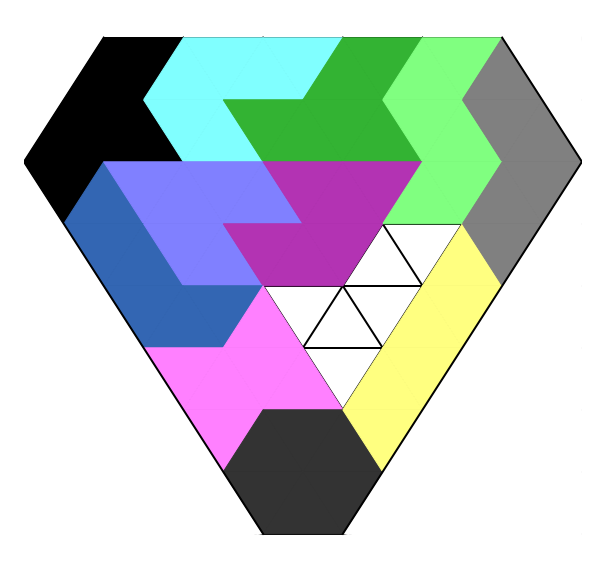

In [ ]:
tb.reset()
tb.start()
solns = []
for s in solve(b,4):
    solns.append(s)
    #s.print_board()
# for soln in solve(b):
#     soln.print_board()
tb.stop()

for s in solns:
    s.print_board()

I have 8 cores
testing 2 threads
testing 3 threads
testing 4 threads
testing 5 threads
testing 6 threads
testing 7 threads
testing 8 threads
testing 9 threads
testing 10 threads
testing 11 threads
testing 12 threads
testing 13 threads
testing 14 threads
testing 15 threads


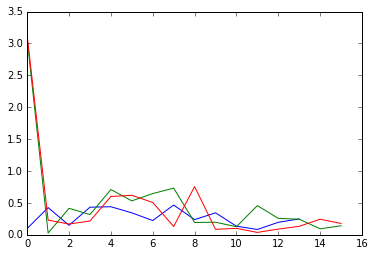

In [7]:
def tester(num_threads):
    tb.reset()
    tb.start()
    solns = []
    for s in solve(b,num_threads):
        solns.append(s)
        #s.print_board()
    # for soln in solve(b):
    #     soln.print_board()
    return tb.stop()

def timingtester(thread_range,num_iterations):
    ret = []
    for i in thread_range:
        print "testing",i,"threads"
        avg_me = []
        for j in range(num_iterations):
            #print "---iteration",j
            avg_me.append(tester(i))
        ret.append(np.average(avg_me))
    return ret

import matplotlib.pyplot as plt
import numpy as np


print "I have",mp.cpu_count(),"cores"

run2 = timingtester(range(2,16),5)

plt.plot(run1)
plt.plot(run2)
plt.show()

In [ ]:
for soln in solns:
    soln.print_board()
tb.show()

In [ ]:
from solver import *

def combineable(previous_solution=Board(),depth=12,):
    global sh
    pieces = unplaced_pieces(previous_solution)
    sh.add_entry(previous_solution)
    if len(pieces)<=12-depth:
        #print 'yielding'
        yield previous_solution
    else:
        for pn in pieces:
            p = Piece(pn)
            for ns in yield_all_fits(previous_solution,p):
                if sh.already_searched(ns):
                    continue
                for sol in combineable(ns,depth):
                    yield sol

def has_piece_with_n_neighbors(sol,num):
    neighboring_pieces = {}
    for piece_name in sol.piece_names():
        neighboring_pieces[piece_name] = []
    for t in sol.occupied():
        for d,n in t.neighbors.iteritems():
            if n.piece_name != t.piece_name:
                if n.occupied and n.piece_name not in neighboring_pieces[t.piece_name]:
                    neighboring_pieces[t.piece_name].append(n.piece_name)
    for p,nlist in neighboring_pieces.iteritems():
        if len(nlist)>=num:
            return True
    return False

def combineable_solve(board=Board(),depth=3,num_neighbors=3):
    global sh
    sh = Search_History()
    tb.start('finding sols')
    solns = [s for s in combineable(board,depth)]
    tb.pause('finding sols')
    for sol in solns:
        tb.start('test')
        test = has_piece_with_n_neighbors(sol,num_neighbors)
        tb.pause('test')
        if test:
            yield copy.deepcopy(sol)



In [ ]:
test = [s for s in combineable_solve(depth=2,num_neighbors=2)]

In [ ]:
from Queue import Queue

q = Queue()
q.put(1)
q.put(2)
q.qsize()
q.get()
q.qsize()

In [ ]:
tb.reset()

In [ ]:
#print [n for n in b.piece_names()]
print has_piece_with_n_neighbors(b,2)

In [ ]:
b.print_board()

In [ ]:
import copy
def sub(i,working_copy):
    if i%2 == 0:
        return
    working_copy.append(i)
    return copy.deepcopy(working_copy)

def yield_func(i):
    working_copy = []
    s = sub(i,working_copy)
    return s

def test():
    global p

    out = p.map(yield_func,list(range(1000)))
    return out
    
global p
p = Pool(15)

for res in test():
    if res is not None:
        print res
        time.sleep(1)

In [ ]:

def same_board(b1,b2):
    occupied_b1 = [t.coords for t in b1.occupied()]
    occupied_b2 = [t.coords for t in b2.occupied()]
    return occupied_b1 == occupied_b2

p1 = Piece('nike')
p2 = Piece('weird')

b1 = Board()
b2 = Board()

b1.place(p1,[3,2])
b1.place(p2,[3,7])

b2.place(p1,[3,2])
b2.place(p2,[3,7])

print [p.piece_name for p in b1.pieces]
print [p.piece_name for p in b2.pieces]

print same_board(b1,b2)


In [ ]:
tb.reset()


for soln in depth_first_search():
    soln.print_board()
    time.sleep(10)

In [ ]:
b = Board()
p = Piece('boat')
p.rotate()

for y in range(2):
    for x in range(10):
        try:
            b.place(p,[y,x],2)
            b.unplace(p.piece_name)
        except Exception:
            continue